# Purchase Behavior Analysis
## Luke Sullivan

---

## Dataset
The dataset used for this analysis is the **Walmart Customer Purchase Behavior Dataset** collected by Walmart available on [Kaggle.com](https://www.kaggle.com/datasets/logiccraftbyhimanshi/walmart-customer-purchase-behavior-dataset).

In [28]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [29]:
data = pd.read_csv('Walmart_customer_purchases.csv')
data.shape

(50000, 12)

In [30]:
columns = np.array(data.columns)
print('Columns:', columns)

Columns: ['Customer_ID' 'Age' 'Gender' 'City' 'Category' 'Product_Name'
 'Purchase_Date' 'Purchase_Amount' 'Payment_Method' 'Discount_Applied'
 'Rating' 'Repeat_Customer']


In [31]:
print(data.isnull().sum())

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64


In [32]:
data.head(10)

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes
5,fdf82943-1b5f-4e0a-bf42-9a8e2035924e,59,Female,North Josemouth,Electronics,Laptop,2024-02-15,435.48,Cash on Delivery,No,3,No
6,582e8439-2b9b-46bd-93ff-71d610f455cc,47,Male,Johnsonton,Beauty,Perfume,2024-12-19,231.04,Debit Card,No,4,Yes
7,664555b7-7fd7-44a8-b4da-ec00230381b9,23,Other,Hoffmanmouth,Home,Sofa Cover,2024-09-28,240.91,Cash on Delivery,No,2,No
8,a8e37b6a-d34c-4d21-84fc-ef713d4859be,60,Female,South Billyberg,Beauty,Shampoo,2025-01-30,179.76,UPI,Yes,5,Yes
9,fa3bfd3a-99a4-41c7-bebc-8b04dc4c95f7,52,Female,North Katherinemouth,Home,Cookware,2024-12-23,463.43,Cash on Delivery,Yes,3,No


In [47]:
unique_id_count = data['Customer_ID'].nunique()
print("Number of unique Customer_IDs:", unique_id_count)

Number of unique Customer_IDs: 50000


In [ ]:
#all customer id values are unique, assume I.I.D?

### Gender

In [34]:
print(data['Gender'].unique())

['Female' 'Other' 'Male']


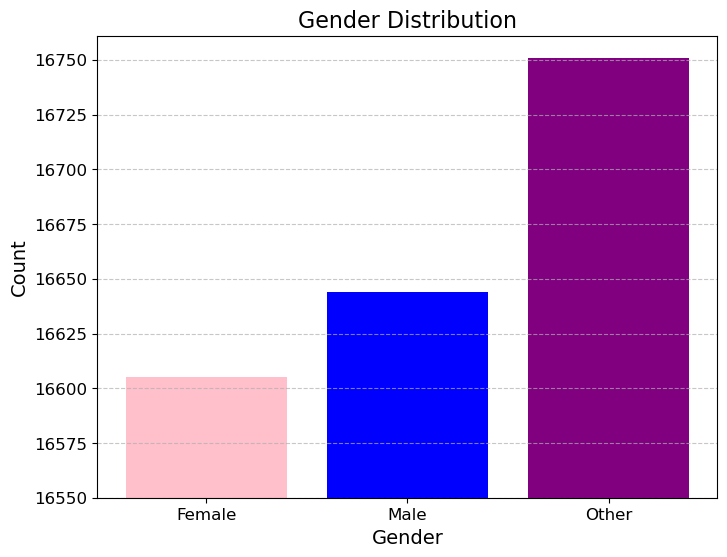

Female Gender Count: 16605
Male Gender Count: 16644
Other Gender Count: 16751


In [40]:
female_gender_count = data[data['Gender'] == "Female"].shape[0]
male_gender_count = data[data['Gender'] == "Male"].shape[0]
other_gender_count = data[data['Gender'] == "Other"].shape[0]

gender_counts = {
    "Female": female_gender_count,
    "Male": male_gender_count,
    "Other": other_gender_count
}

plt.figure(figsize=(8, 6)) 
plt.bar(gender_counts.keys(), gender_counts.values(), color=['pink', 'blue', 'purple'])
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
min_y = 16550
max_y = max(gender_counts.values()) + 10  # Set a bit above the largest count
plt.ylim(min_y, max_y)  # Adjust y-axis limits
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print("Female Gender Count:", female_gender_count)
print("Male Gender Count:", male_gender_count)
print("Other Gender Count:", other_gender_count)

### Age

In [21]:
ages = data['Age'].unique()
ages_array = np.array(ages)
ages_array = np.sort(ages_array)
print(ages_array)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]


In [26]:
ages = pd.DataFrame(ages_array)
ages.describe()

,0
count,43.000000
mean,39.000000
std,12.556539
min,18.000000
25%,28.500000
50%,39.000000
75%,49.500000
max,60.000000


Age Group Counts:
Teens: 2338
20s: 11692
30s: 11646
40s: 11621
50s: 11552
60s: 1151


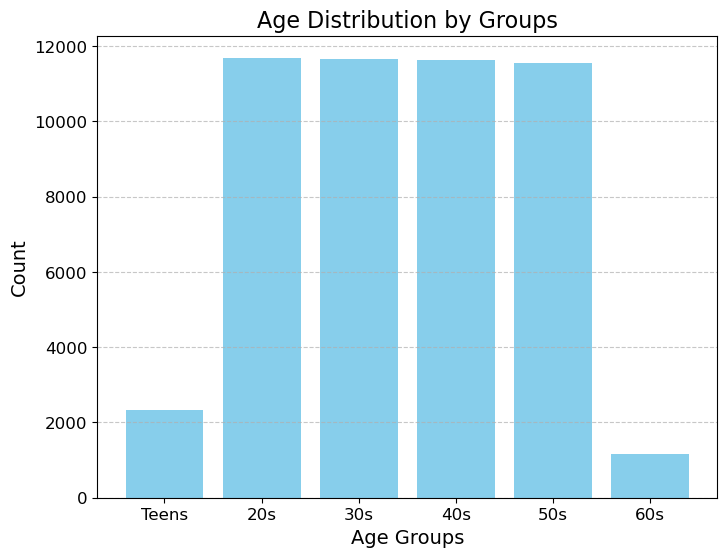

In [46]:
bins = [10, 19, 29, 39, 49, 59, 69]  # Upper bounds for each range
labels = ['Teens', '20s', '30s', '40s', '50s', '60s']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

age_group_counts = data['Age_Group'].value_counts().sort_index()

print("Age Group Counts:")
for group, count in age_group_counts.items():
    print(f"{group}: {count}")

plt.figure(figsize=(8, 6))
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='skyblue')
plt.title("Age Distribution by Groups", fontsize=16)
plt.xlabel("Age Groups", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### City

In [ ]:
#continue..